<a href="https://colab.research.google.com/github/bayysp/rockpaperscissor_classification/blob/master/cnn_ml_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# !wget --no-check-certificate \
#   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
#   -O /tmp/rockpaperscissors.zip

--2020-05-10 20:09:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.78MB/s    in 69s     

2020-05-10 20:10:39 (4.49 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
#do extraction to datasets zip file
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_reference = zipfile.ZipFile(local_zip,'r')
zip_reference.extractall('/tmp')
zip_reference.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [28]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt', 'rps-cv-images']

In [0]:
#create function to remove unused directory and unused  file
import shutil
def remove_unused_directory(base_dir,directory_name):
  shutil.rmtree(os.path.join(base_dir+directory_name))

def remove_unused_file(base_dir,file_name):
  os.remove(os.path.join(base_dir,file_name))

In [0]:
#remove unused directory
remove_unused_directory(base_dir,'/rps-cv-images')

In [0]:
#remove unused file
remove_unused_file(base_dir,'README_rpc-cv-images.txt')

In [0]:
#create function to make data balance
def delete_file(file_length,file_name,directory):
  for i in range(file_length):
    if i > 710:
      os.remove(os.path.join(directory, file_name[i]))

In [41]:
#remove file to make data balance
rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

rock_img = os.listdir(rock_dir)
paper_img = os.listdir(paper_dir)
scissors_img = os.listdir(scissors_dir)

delete_file(len(os.listdir(rock_dir)), rock_img, rock_dir)
delete_file(len(os.listdir(paper_dir)), paper_img, paper_dir)
delete_file(len(os.listdir(scissors_dir)), scissors_img, scissors_dir)

print('total of rock images : ', len(os.listdir(rock_dir)))
print('total of paper images : ', len(os.listdir(paper_dir)))
print('total of scissors images : ', len(os.listdir(scissors_dir)))

total of rock images :  711
total of paper images :  711
total of scissors images :  711


In [46]:
os.listdir('/tmp/rockpaperscissors/')

['rock', 'scissors', 'paper']

In [0]:
#@title Default title text
#make a train and validation folder and move the files

parent_dir = '/tmp/rockpaperscissors/'

train_dir = 'train'
validation_dir = 'val'

In [0]:
#create train directory
train_path = os.path.join(parent_dir,train_dir)
os.mkdir(train_path)
print("directory '% s' created" % train_dir)

In [58]:
#create validation directory
val_path = os.path.join(parent_dir,validation_dir)
os.mkdir(val_path)
print("directory '% s' created" % validation_dir)

directory 'val' created


In [0]:
#create rock paper and scissors directory on train folder
os.mkdir(os.path.join(parent_dir,'train/rock'))
os.mkdir(os.path.join(parent_dir,'train/paper'))
os.mkdir(os.path.join(parent_dir,'train/scissors'))

print("directory rock paper scissors created")

In [0]:
#create rock paper and scissors directory on val folder
os.mkdir(os.path.join(parent_dir,'val/rock'))
os.mkdir(os.path.join(parent_dir,'val/paper'))
os.mkdir(os.path.join(parent_dir,'val/scissors'))

print("directory rock paper scissors created")

In [88]:
#create function to move file into new directory (train and val)
def move_files_to_val():
  for i in range(0,72):
    try:
      shutil.move(parent_dir+'rock/'+rock_img[i],'/tmp/rockpaperscissors/val/rock')
      shutil.move(parent_dir+'paper/'+paper_img[i],'/tmp/rockpaperscissors/val/paper')
      shutil.move(parent_dir+'scissors/'+scissor_img[i],'/tmp/rockpaperscissors/val/scissors')
    except Exception as ex:
      print(ex)

# move_files_to_val()

print('total of rock images on val directory : ', len(os.listdir('/tmp/rockpaperscissors/val/rock')))
print('total of paper images on val directory : ', len(os.listdir('/tmp/rockpaperscissors/val/paper')))
print('total of scissors images on val directory : ', len(os.listdir('/tmp/rockpaperscissors/val/scissors')))

total of rock images on val directory :  72
total of paper images on val directory :  72
total of scissors images on val directory :  72


In [89]:
#create function to move file into new directory (train and val)
def move_files_to_train():
  for i in range(0,len(rock_img)):
    try:
      shutil.move(parent_dir+'rock/'+rock_img[i],'/tmp/rockpaperscissors/train/rock')
    except Exception as ex:
      print(ex)

  for i in range(0,len(paper_img)):
    try:
      shutil.move(parent_dir+'paper/'+paper_img[i],'/tmp/rockpaperscissors/train/paper')
    except Exception as ex:
      print(ex)

  for i in range(0,len(scissor_img)):
    try:
      shutil.move(parent_dir+'scissors/'+scissor_img[i],'/tmp/rockpaperscissors/train/scissors')
    except Exception as ex:
      print(ex)

# move_files_to_train()

print('total of rock images on train directory : ', len(os.listdir('/tmp/rockpaperscissors/train/rock')))
print('total of paper images on train directory : ', len(os.listdir('/tmp/rockpaperscissors/train/paper')))
print('total of scissors images on train directory : ', len(os.listdir('/tmp/rockpaperscissors/train/scissors')))

total of rock images on train directory :  639
total of paper images on train directory :  639
total of scissors images on train directory :  639


In [0]:
#remove unused directory again
remove_unused_directory(base_dir,'/rock')
remove_unused_directory(base_dir,'/paper')
remove_unused_directory(base_dir,'/scissors')

In [147]:
#THE CODE STARTS HERE

#do image augmentation

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
    # rotation_range = 20,
    # horizontal_flip = True,
    # shear_range = 0.2,
    # zoom_range = 0.2,
    # fill_mode = 'nearest'
)

train_gen = train_datagen.flow_from_directory(
    '/tmp/rockpaperscissors/train',
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_gen = test_datagen.flow_from_directory(
    '/tmp/rockpaperscissors/val',
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1917 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [0]:
#build model

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

classifier = Sequential()

#convolution
classifier.add(Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'))

#pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second convolution
classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#flattening
classifier.add(Flatten())

#full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'sigmoid'))

In [149]:
#see models summary
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               7373056   
_________________________________________________________________
dense_10 (Dense)             (None, 3)                

In [0]:
#compiling
classifier.compile(
    optimizer = RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [151]:
history = classifier.fit(
    train_gen,
    steps_per_epoch = 64,
    epochs = 20,
    validation_data = validation_gen,
    validation_steps = 8,
    verbose = 1
)

Epoch 1/20
64/64 [==============================] - 12s 183ms/step - loss: 0.9630 - accuracy: 0.5183 - val_loss: 0.6854 - val_accuracy: 0.6895
Epoch 2/20
64/64 [==============================] - 12s 185ms/step - loss: 0.7611 - accuracy: 0.6939 - val_loss: 0.5382 - val_accuracy: 0.7540
Epoch 3/20
64/64 [==============================] - 12s 186ms/step - loss: 0.6343 - accuracy: 0.7496 - val_loss: 0.5810 - val_accuracy: 0.7621
Epoch 4/20
64/64 [==============================] - 12s 182ms/step - loss: 0.5875 - accuracy: 0.7643 - val_loss: 0.4587 - val_accuracy: 0.7702
Epoch 5/20
64/64 [==============================] - 12s 182ms/step - loss: 0.5087 - accuracy: 0.7946 - val_loss: 0.2819 - val_accuracy: 0.8790
Epoch 6/20
64/64 [==============================] - 12s 182ms/step - loss: 0.4574 - accuracy: 0.8240 - val_loss: 0.4261 - val_accuracy: 0.8871
Epoch 7/20
64/64 [==============================] - 11s 179ms/step - loss: 0.4258 - accuracy: 0.8448 - val_loss: 0.1454 - val_accuracy: 0.9000

In [0]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

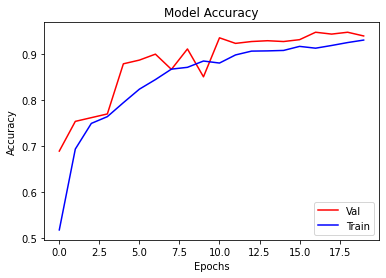

In [153]:
import matplotlib.pyplot as plt

plt.plot(epochs,val_accuracy,'r',label='Validation Accuracy')
plt.plot(epochs,accuracy,'b',label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Val', 'Train'], loc='lower right')
plt.show()

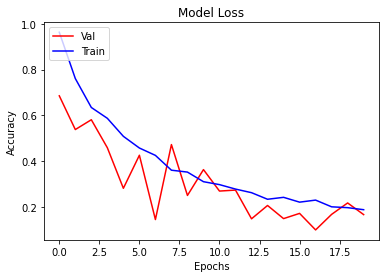

In [154]:
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.plot(epochs,loss,'b',label='Training Loss')
plt.title('Model Loss')
plt.legend(['Val', 'Train'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Saving Zyzp7nBCojgQeCZs.png to Zyzp7nBCojgQeCZs.png
fn : Zyzp7nBCojgQeCZs.png
[[0. 0. 0.]]
(1, 3)
undetected


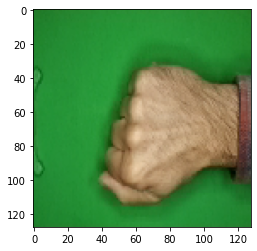

In [156]:
#MAKE A PREDICTION

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  paths = fn
  img = image.load_img(paths, target_size=(128,128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = classifier.predict(images, batch_size=10)
  
  print("fn : "+fn)
  print(classes)

  print(classes.shape)

  if classes[0][0] == 1.0:
    print("Predict : Paper")
  elif classes[0][1] == 1.0:
    print("Predict : Rock")
  elif classes[0][2] == 1.0:
    print("Predict : Scissor")
  else :
    print("undetected")